In [2]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


Number of GPU:  1
GPU Name:  NVIDIA GeForce GTX 1650 Ti


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)


Using device: cuda


In [4]:

import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [6]:
if torch.cuda.is_available():
    # Print GPU memory information
    print(f"Allocated memory: {torch.cuda.memory_allocated() / 1e6} MB")
    print(f"Reserved memory: {torch.cuda.memory_reserved() / 1e6} MB")
    

Allocated memory: 0.0 MB
Reserved memory: 0.0 MB


In [8]:
torch.cuda.empty_cache()

In [9]:
# Setup paths
import os

POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')


In [10]:

# Check if CUDA is available
if torch.cuda.is_available():
    # Number of GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")
    
    # List each GPU and its name
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available. Please check your GPU setup.")


Number of GPUs available: 1
GPU 0: NVIDIA GeForce GTX 1650 Ti


In [11]:
POS_PATH

'data\\positive'

In [12]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [13]:
!tar -xf "C:\Users\kalia\siameseProject\lfw.tgz"

In [15]:
# Move LFW Images to the following repository data/negative
import os
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [14]:
# Import uuid library to generate unique image names (universally unique identifiers)
import uuid

In [15]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\2fba1744-69e1-11ef-8094-e91f9dfe12c4.jpg'

In [16]:
uuid.uuid1()

UUID('312de311-69e1-11ef-848e-e91f9dfe12c4')

In [17]:
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
    
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
        
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    cv2.imshow('Image Collection', frame)
    
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

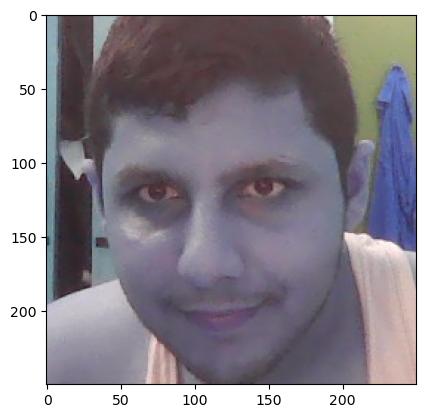

In [18]:
plt.imshow(frame)

In [1]:
pip install torch torchvision


In [108]:
import os
import glob
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((100, 100)),  # Resize images to 128x128
    transforms.ToTensor()
])

class CustomDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.file_paths = glob.glob(os.path.join(folder_path, '*.jpg'))
        self.file_paths = self.file_paths[:300]  # Limit to 300 files
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Define transformations if needed
transform = transforms.Compose([
    transforms.Resize((100, 100)),  # Resize images to 128x128
    transforms.ToTensor()
])

# Create datasets
anchor_dataset = CustomDataset('data/anchor', transform=transform)
positive_dataset = CustomDataset('data/positive', transform=transform)
negative_dataset = CustomDataset('data/negative', transform=transform)

# Create dataloaders
anchor_loader = DataLoader(anchor_dataset, batch_size=32, shuffle=True)
positive_loader = DataLoader(positive_dataset, batch_size=32, shuffle=True)
negative_loader = DataLoader(negative_dataset, batch_size=32, shuffle=True)


In [23]:

# Get one batch of data
for batch in anchor_loader:
    # Convert the batch (a tensor) to NumPy array
    batch_numpy = batch.numpy()
    print(batch_numpy[0])  # Print the first image in the batch
    break  # Exit loop after first batch for inspection


[[[0.78039217 0.7764706  0.7647059  ... 0.9254902  0.9137255  0.89411765]
  [0.78431374 0.7764706  0.76862746 ... 0.8627451  0.85882354 0.8509804 ]
  [0.7764706  0.76862746 0.7529412  ... 0.83137256 0.8117647  0.8039216 ]
  ...
  [0.99607843 1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         0.99607843 ... 1.         1.         1.        ]]

 [[0.7921569  0.78039217 0.76862746 ... 0.94509804 0.93333334 0.9137255 ]
  [0.7882353  0.78039217 0.76862746 ... 0.8784314  0.8745098  0.8666667 ]
  [0.78039217 0.76862746 0.7529412  ... 0.8352941  0.8235294  0.81960785]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[0.81960785 0.8039216  0.78039217 ... 0.95686275 0.94509804 0.9254902 ]
  [0.8117647  0.796078

In [24]:
from PIL import Image
import torch
from torchvision import transforms

# Define the preprocessing function
def preprocess(file_path):
    # Load the image from the file path
    img = Image.open(file_path).convert('RGB')
    
    # Define the transformations: Resize to 100x100 and scale pixel values between 0 and 1
    transform = transforms.Compose([
        transforms.Resize((100, 100)),  # Resize to 100x100
        transforms.ToTensor(),  # Convert to tensor and scale to [0, 1] range
    ])
    
    # Apply the transformations to the image
    img = transform(img)
    
    # Return the processed image tensor
    return img

# Example usage
file_path = r'data\anchor\5b0d1de1-62ed-11ef-bcb4-db68406301ae.jpg'
processed_img = preprocess(file_path)
print(processed_img.shape)  # Should print: torch.Size([3, 100, 100])


torch.Size([3, 100, 100])


In [25]:
processed_img.numpy().max()

1.0

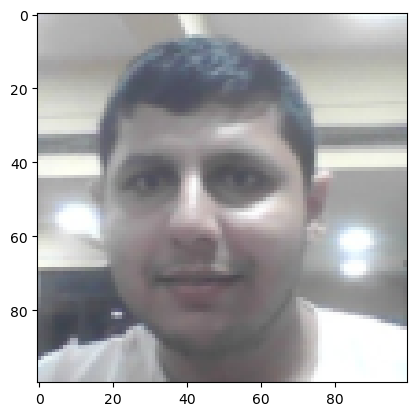

In [27]:
import matplotlib.pyplot as plt

# If using PyTorch tensors
processed_img = processed_img.permute(1, 2, 0)

# If using a NumPy array (after converting from tensor)
# processed_img = processed_img.numpy().transpose(1, 2, 0)

plt.imshow(processed_img)
plt.show()


In [29]:
import torch
from torch.utils.data import DataLoader

# Create DataLoader instances
anchor_loader = DataLoader(anchor_dataset, batch_size=32, shuffle=False)
positive_loader = DataLoader(positive_dataset, batch_size=32, shuffle=False)
negative_loader = DataLoader(negative_dataset, batch_size=32, shuffle=False)

# Example: Process one batch from each dataset
for batch in anchor_loader:
    print(batch.shape)  # Prints: torch.Size([32, 3, 100, 100])
    # Further processing can be done here
    break


torch.Size([32, 3, 100, 100])


In [149]:
import os
import glob
from PIL import Image
import torch
from torchvision import transforms

# Define the preprocessing transformation
transform = transforms.Compose([
    transforms.Resize((100, 100)),  # Resize images to 100x100
    transforms.ToTensor()  # Convert to tensor
])

class CustomDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.file_paths = glob.glob(os.path.join(folder_path, '*.jpg'))
        self.file_paths = self.file_paths[:300]  # Limit to 300 files
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image,0

def preprocess_and_save(dataset, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    for i in range(len(dataset)):
        img_tensor, _ = dataset[i]  # Unpack the tuple to get only the image tensor
        
        # Convert tensor to PIL Image
        img = transforms.ToPILImage()(img_tensor)
        
        # Save the image
        img.save(os.path.join(output_folder, f'img_{i}.jpg'))


# Paths to datasets
anchor_dataset = CustomDataset('data/anchor', transform=transform)
positive_dataset = CustomDataset('data/positive', transform=transform)
negative_dataset = CustomDataset('data/negative', transform=transform)

# Preprocess and save datasets
preprocess_and_save(anchor_dataset, 'data/processed/anchor')
preprocess_and_save(positive_dataset, 'data/processed/positive')
preprocess_and_save(negative_dataset, 'data/processed/negative')

print("Preprocessing and saving completed.")


Preprocessing and saving completed.


In [150]:
import torch
from torch.utils.data import DataLoader, Dataset, ConcatDataset

# Ensure anchor_dataset, positive_dataset, and negative_dataset are properly defined and preprocessed
class TripletDataset(Dataset):
    def __init__(self, anchor_dataset, positive_dataset, negative_dataset):
        self.anchor_dataset = anchor_dataset
        self.positive_dataset = positive_dataset
        self.negative_dataset = negative_dataset

        self.anchor_len = len(anchor_dataset)
        self.positive_len = len(positive_dataset)
        self.negative_len = len(negative_dataset)

        assert self.anchor_len == self.positive_len == self.negative_len, "All datasets must have the same length"

    def __len__(self):
        return self.anchor_len + self.negative_len

    def __getitem__(self, idx):
        if idx < self.anchor_len:
            anchor_img, _ = self.anchor_dataset[idx]
            positive_img, _ = self.positive_dataset[idx]
            label = 1
            return anchor_img, positive_img, label
        else:
            idx = idx - self.anchor_len
            anchor_img, _ = self.anchor_dataset[idx]
            negative_img, _ = self.negative_dataset[idx]
            label = 0
            return anchor_img, negative_img, label

# Create an instance of TripletDataset
triplet_dataset = TripletDataset(anchor_dataset, positive_dataset, negative_dataset)

# Create a DataLoader for batch processing
data_loader = DataLoader(triplet_dataset, batch_size=32, shuffle=True)

# Example: Iterating through the DataLoader
for batch in data_loader:
    anchor_imgs, other_imgs, labels = batch

    # Convert tensors to NumPy arrays if needed
    anchor_imgs_np = anchor_imgs.numpy()
    other_imgs_np = other_imgs.numpy()
    labels_np = labels.numpy()

    # Print the shapes of the numpy arrays
    print("Anchor Images Shape:", anchor_imgs_np.shape)
    print("Other Images Shape:", other_imgs_np.shape)
    print("Labels Shape:", labels_np.shape)

    # Break after the first batch for inspection
    break
    print("Anchor Images:", anchor_imgs_np.shape)


Anchor Images Shape: (32, 3, 100, 100)
Other Images Shape: (32, 3, 100, 100)
Labels Shape: (32,)


In [151]:
import random

# Create an instance of the dataset
dataset = CustomDataset('data/anchor', transform=transform)

# Generate a random index
random_idx = random.randint(0, len(dataset) - 1)

# Access the image and label at the random index
image, label = dataset[random_idx]

# Print the label
print(f"Label for the random image at index {random_idx}: {label}")

# Optionally, display the image
img = transforms.ToPILImage()(image)
img.show()  # This will display the image using the default image viewer


Label for the random image at index 131: 0


In [152]:
print("Sample Anchor Image Label:", labels_np[0])

Sample Anchor Image Label: 1


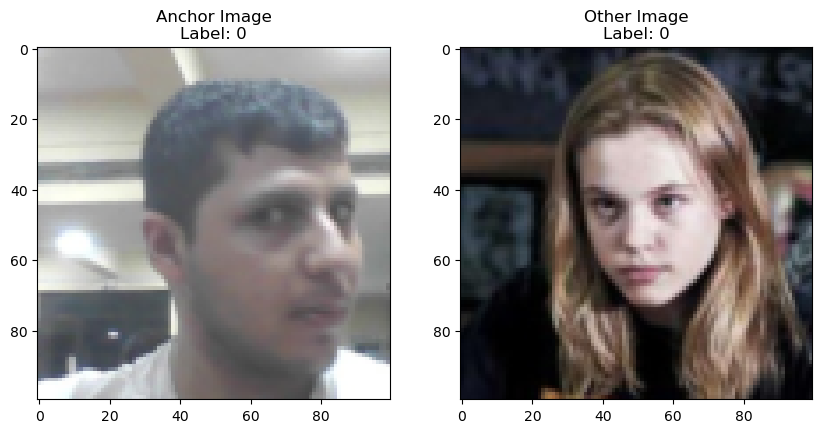

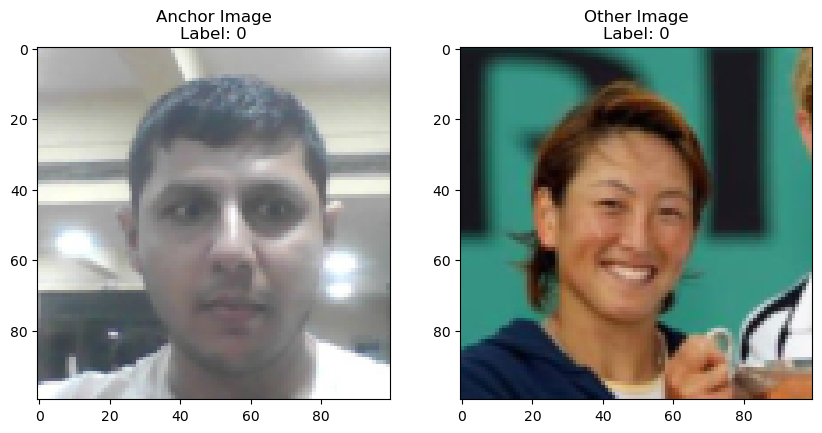

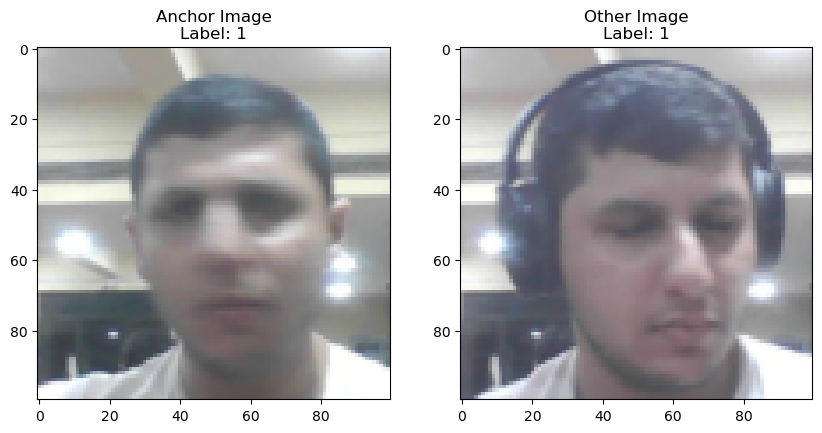

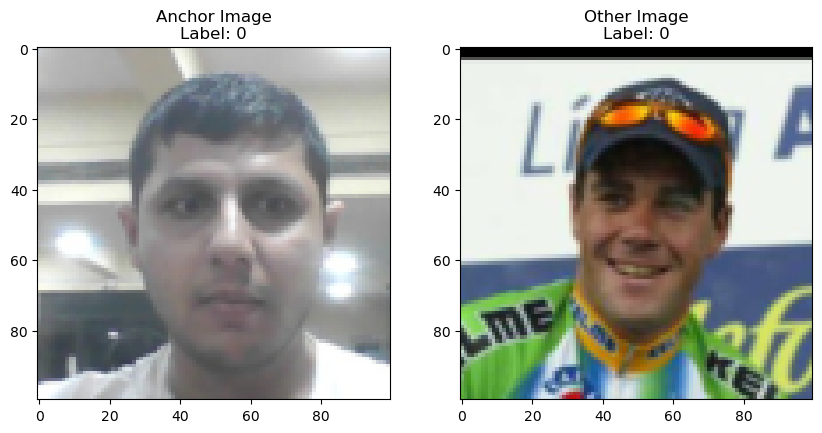

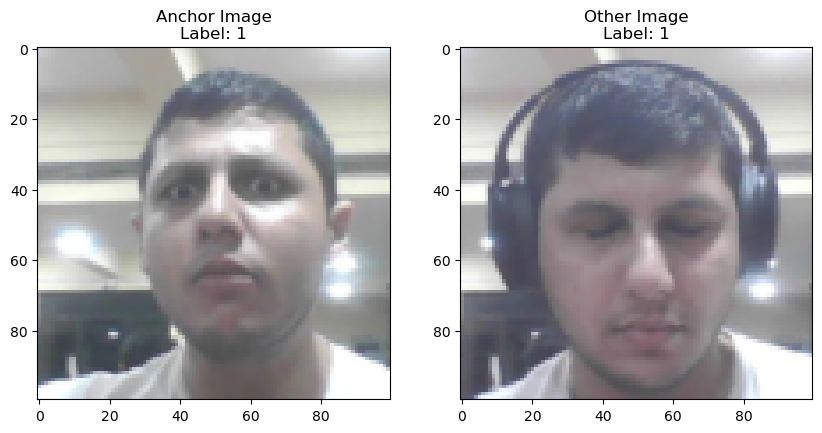

In [153]:
import random
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

def visualize_random_samples(dataset, num_samples=5):
    for _ in range(num_samples):
        idx = random.randint(0, len(dataset) - 1)  # Get a random index
        anchor_img, other_img, label = dataset[idx]
        
        # Convert tensors to NumPy arrays for plotting
        anchor_img_np = anchor_img.permute(1, 2, 0).numpy()
        other_img_np = other_img.permute(1, 2, 0).numpy()
        
        # Plotting
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(anchor_img_np)
        plt.title(f'Anchor Image\nLabel: {label}')  # Directly use label
        
        plt.subplot(1, 2, 2)
        plt.imshow(other_img_np)
        plt.title(f'Other Image\nLabel: {label}')
        
        plt.show()

# Call the function to visualize random samples
visualize_random_samples(triplet_dataset)


In [166]:
from torch.utils.data import DataLoader, random_split

from torch.utils.data import Subset
# Define datasets with preprocessed images
anchor_dataset = CustomDataset('data/processed/anchor', transform=transform)
positive_dataset = CustomDataset('data/processed/positive',transform=transform)
negative_dataset = CustomDataset('data/processed/negative',transform=transform)

# Define the TripletDataset
triplet_dataset = TripletDataset(anchor_dataset, positive_dataset, negative_dataset)

# Create a DataLoader for the entire dataset
full_data_loader = DataLoader(triplet_dataset, batch_size=16, shuffle=True, num_workers=8)

# Split the dataset into training and testing sets
total_size = len(triplet_dataset)
train_size = int(0.7 * total_size)
test_size = total_size - train_size

from torch.utils.data import Subset

# Indices for training and testing
train_indices = list(range(train_size))
test_indices = list(range(train_size , total_size))

# Create subsets
train_subset = Subset(triplet_dataset, train_indices)
test_subset = Subset(triplet_dataset, test_indices)

# Create DataLoaders for training and testing sets
train_loader = DataLoader(train_subset, batch_size=16, shuffle=True, num_workers=0)
test_loader = DataLoader(test_subset, batch_size=16, shuffle=False, num_workers=0)



In [155]:
# Simplify for testing
simple_dataset = torch.utils.data.TensorDataset(torch.randn(10, 3, 100, 100), torch.randint(0, 2, (10,)))
simple_loader = DataLoader(simple_dataset, batch_size=2, shuffle=True)

# Test the simplified loader
for batch in simple_loader:
    images, labels = batch
    print(images.shape, labels)
    break


torch.Size([2, 3, 100, 100]) tensor([1, 0])


In [156]:
simple_loader = DataLoader(triplet_dataset, batch_size=2, shuffle=True, num_workers=0)


In [147]:
simple_dataset = torch.utils.data.TensorDataset(
    torch.randn(10, 3, 100, 100),  # Anchor images
    torch.randn(10, 3, 100, 100),  # Other images
    torch.randint(0, 2, (10,))      # Labels
)

simple_loader = DataLoader(simple_dataset, batch_size=2, shuffle=True, num_workers=0)

In [157]:
def check_batch_contents(data_loader):
    try:
        # Fetch a batch from the DataLoader
        batch = next(iter(data_loader))
        
        # Check the number of elements in the batch
        print(f"Batch length: {len(batch)}")
        print(f"Batch content types: {[type(item) for item in batch]}")
        
        # Print out the first few items
        for i, item in enumerate(batch):
            print(f"Item {i} type: {type(item)}")
            if isinstance(item, torch.Tensor):
                print(f"Item {i} shape: {item.shape}")
            elif isinstance(item, (list, tuple)):
                print(f"Item {i} length: {len(item)}")
                
    except Exception as e:
        print(f"Error while checking batch contents: {e}")

# Check the contents of a batch from the train_loader
check_batch_contents(train_loader)


Batch length: 3
Batch content types: [<class 'torch.Tensor'>, <class 'torch.Tensor'>, <class 'torch.Tensor'>]
Item 0 type: <class 'torch.Tensor'>
Item 0 shape: torch.Size([16, 3, 100, 100])
Item 1 type: <class 'torch.Tensor'>
Item 1 shape: torch.Size([16, 3, 100, 100])
Item 2 type: <class 'torch.Tensor'>
Item 2 shape: torch.Size([16])


In [158]:
def check_batch_contents(data_loader):
    try:
        # Fetch a batch from the DataLoader
        batch = next(iter(data_loader))
        
        # Print batch information
        print(f"Batch length: {len(batch)}")
        for i, item in enumerate(batch):
            print(f"Item {i} type: {type(item)}")
            if isinstance(item, torch.Tensor):
                print(f"Item {i} shape: {item.shape}")
            elif isinstance(item, (list, tuple)):
                print(f"Item {i} length: {len(item)}")
            else:
                print(f"Item {i} value: {item}")
                
    except Exception as e:
        print(f"Error while checking batch contents: {e}")

# Check the contents of a batch from the train_loader
check_batch_contents(train_loader)


Batch length: 3
Item 0 type: <class 'torch.Tensor'>
Item 0 shape: torch.Size([16, 3, 100, 100])
Item 1 type: <class 'torch.Tensor'>
Item 1 shape: torch.Size([16, 3, 100, 100])
Item 2 type: <class 'torch.Tensor'>
Item 2 shape: torch.Size([16])


Batch length: 3
Batch content types: [<class 'torch.Tensor'>, <class 'torch.Tensor'>, <class 'torch.Tensor'>]


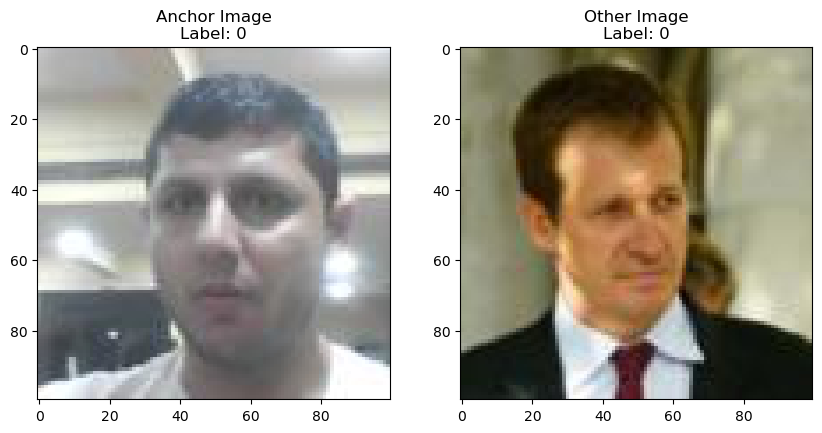

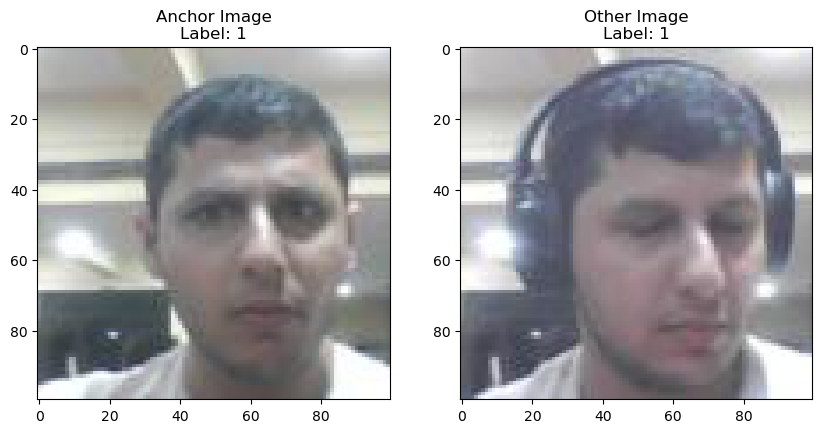

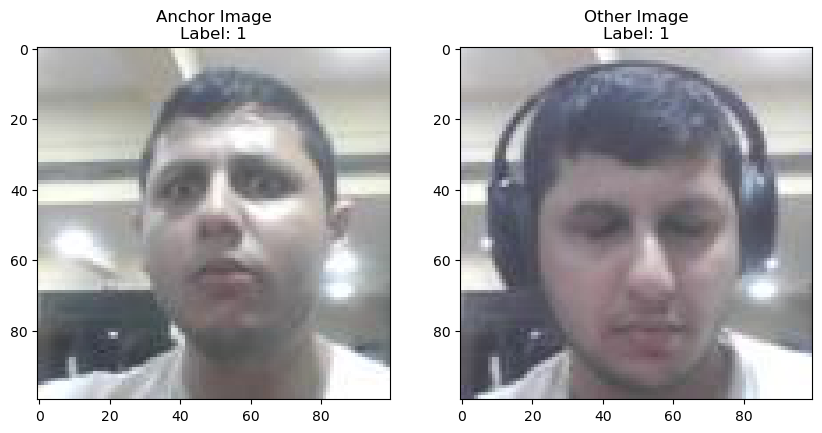

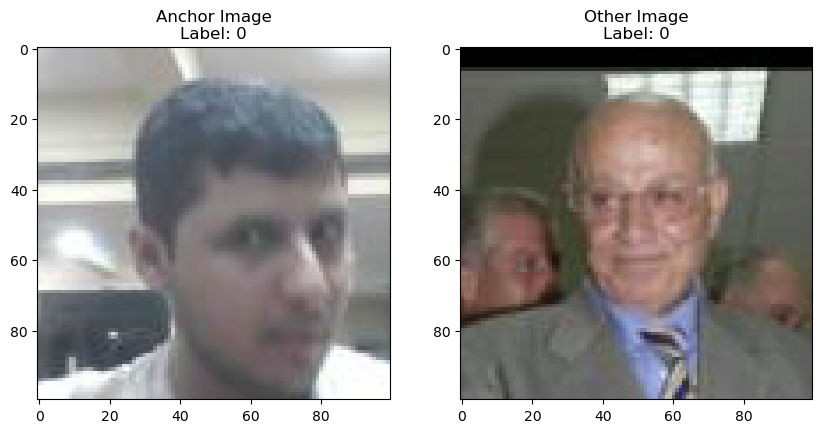

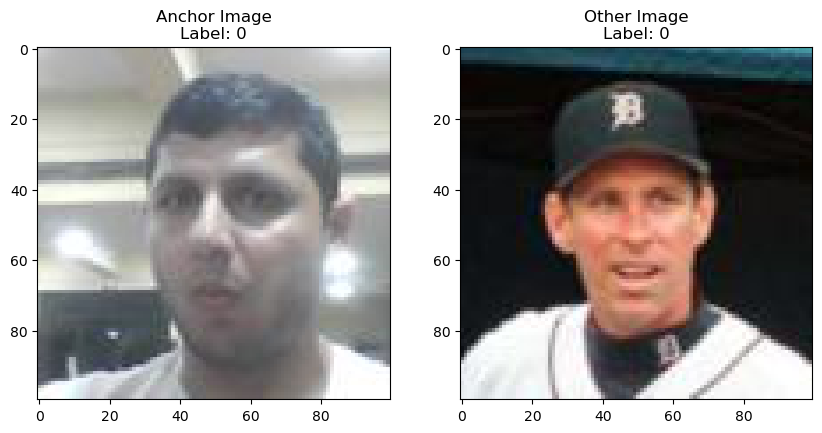

In [159]:
def visualize_batch(data_loader, num_samples=5):
    """
    Visualize a batch of images from the DataLoader.
    """
    try:
        # Fetch a batch from the DataLoader
        batch = next(iter(data_loader))
        
        # Check the number of elements in the batch
        print(f"Batch length: {len(batch)}")
        print(f"Batch content types: {[type(item) for item in batch]}")
        
        # Unpack the batch based on its content
        if len(batch) == 3:
            anchor_imgs, other_imgs, labels = batch
        else:
            raise ValueError("Expected 3 items in the batch, but got a different number.")
        
        for i in range(min(num_samples, len(anchor_imgs))):
            anchor_img_np = anchor_imgs[i].permute(1, 2, 0).numpy()
            other_img_np = other_imgs[i].permute(1, 2, 0).numpy()
            label = labels[i].item()
            
            # Plotting
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(anchor_img_np)
            plt.title(f'Anchor Image\nLabel: {label}')
            
            plt.subplot(1, 2, 2)
            plt.imshow(other_img_np)
            plt.title(f'Other Image\nLabel: {label}')
            
            plt.show()
    except Exception as e:
        print(f"Error while visualizing batch: {e}")

# Test the visualization function
visualize_batch(train_loader)


Batch length: 3
Batch content types: [<class 'torch.Tensor'>, <class 'torch.Tensor'>, <class 'torch.Tensor'>]


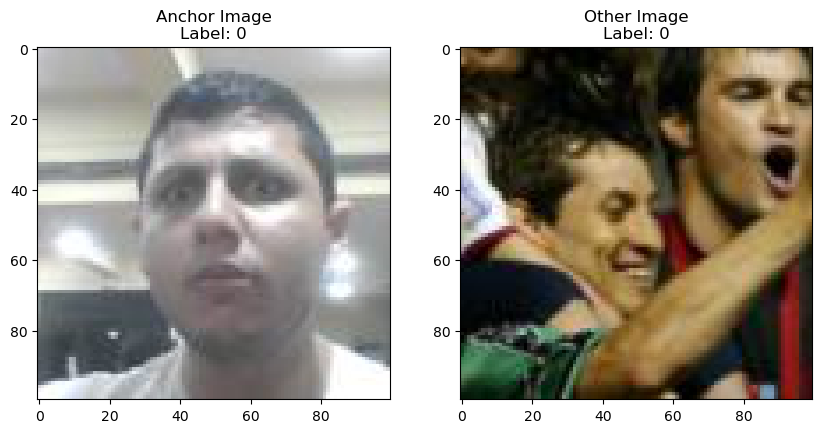

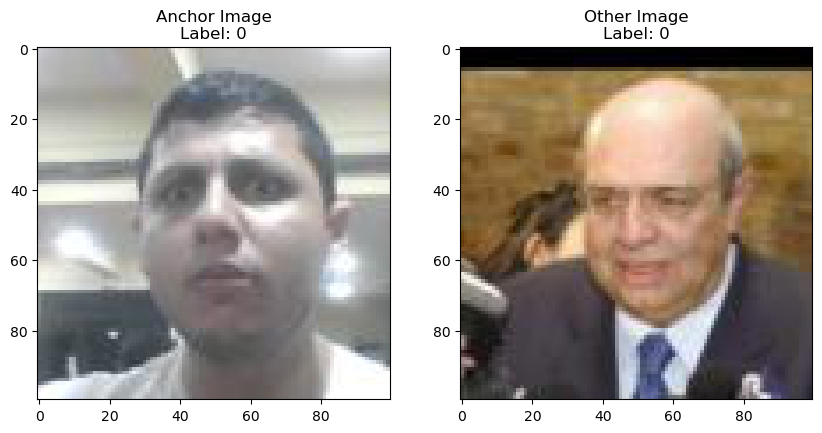

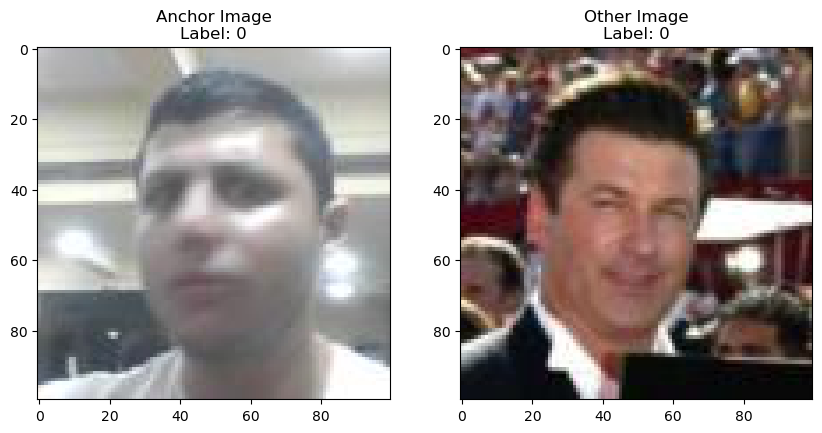

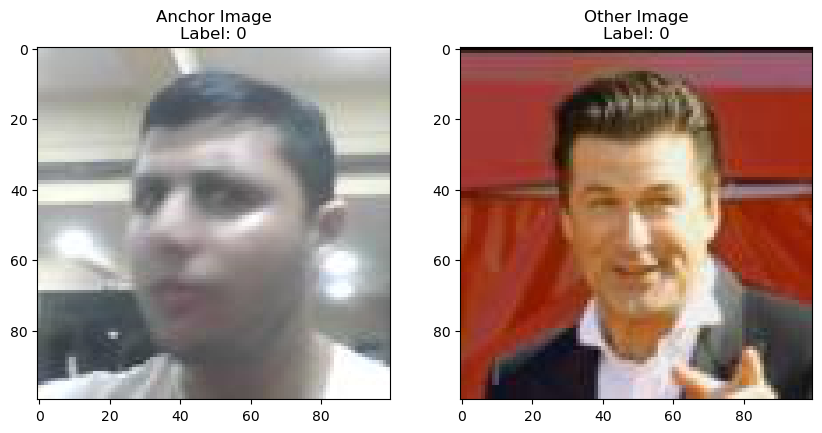

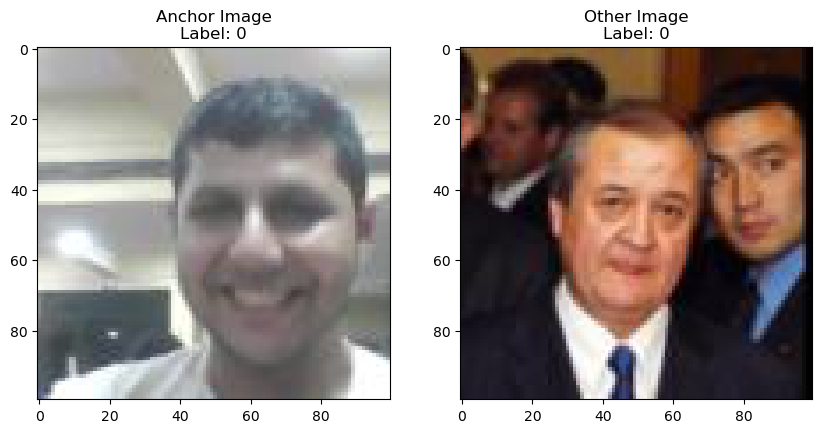

In [167]:
def visualize_batch(data_loader, num_samples=5):
    """
    Visualize a batch of images from the DataLoader.
    """
    try:
        batch = next(iter(data_loader))
        
        # Check the number of elements in the batch
        print(f"Batch length: {len(batch)}")
        print(f"Batch content types: {[type(item) for item in batch]}")
        
        if len(batch) == 3:
            anchor_imgs, other_imgs, labels = batch
        else:
            raise ValueError("Expected 3 items in the batch, but got a different number.")
        
        for i in range(min(num_samples, len(anchor_imgs))):
            anchor_img_np = anchor_imgs[i].permute(1, 2, 0).numpy()
            other_img_np = other_imgs[i].permute(1, 2, 0).numpy()
            label = labels[i].item()
            
            # Plotting
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(anchor_img_np)
            plt.title(f'Anchor Image\nLabel: {label}')
            
            plt.subplot(1, 2, 2)
            plt.imshow(other_img_np)
            plt.title(f'Other Image\nLabel: {label}')
            
            plt.show()
    except Exception as e:
        print(f"Error while visualizing batch: {e}")

# Test the visualization function with the simple loader
visualize_batch(test_loader)


In [169]:
import torch
import torch.nn as nn

class EmbeddingNet(nn.Module):
    def __init__(self):
        super(EmbeddingNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=10, stride=1, padding=0)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=7, stride=1, padding=0)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=4, stride=1, padding=0)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=4, stride=1, padding=0)
        
        # Compute the size of the flattened tensor
        self._to_linear = self._get_flatten_size()
        self.fc1 = nn.Linear(self._to_linear, 4096)

    def _get_flatten_size(self):
        with torch.no_grad():
            x = torch.randn(1, 3, 100, 100)  # Batch size of 1
            x = self.conv1(x)
            x = self.pool1(x)
            x = self.conv2(x)
            x = self.pool2(x)
            x = self.conv3(x)
            x = self.pool3(x)
            x = self.conv4(x)
            return x.numel()

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        x = self.conv4(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = torch.sigmoid(x)
        return x

# Instantiate the model
embedding_net = EmbeddingNet()

# Print model summary
print(embedding_net)


EmbeddingNet(
  (conv1): Conv2d(3, 64, kernel_size=(10, 10), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=6400, out_features=4096, bias=True)
)


In [170]:
import torch
import torch.nn as nn

class L1Dist(nn.Module):
    def __init__(self):
        super(L1Dist, self).__init__()
    
    def forward(self, input_embedding, validation_embedding):
        return torch.abs(input_embedding - validation_embedding)


In [171]:
# Create an instance of L1Dist
l1_dist = L1Dist()

# Example tensors (batch_size, feature_size)
input_embedding = torch.randn(5, 4096)  # Example embeddings
validation_embedding = torch.randn(5, 4096)

# Compute the L1 distance
distance = l1_dist(input_embedding, validation_embedding)

print(distance)


tensor([[1.8048, 0.0200, 1.1289,  ..., 0.0736, 1.3196, 2.4006],
        [0.4174, 0.2947, 0.1953,  ..., 2.2042, 1.2744, 0.3741],
        [1.8563, 0.8225, 1.3587,  ..., 1.1186, 1.0110, 1.0930],
        [0.2826, 2.2784, 0.2613,  ..., 1.0827, 1.2110, 2.3153],
        [2.0359, 0.2078, 0.6638,  ..., 0.2558, 2.3594, 4.4910]])


In [173]:
import torch
import torch.nn as nn

class SiameseNetwork(nn.Module):
    def __init__(self, embedding_net, distance_layer):
        super(SiameseNetwork, self).__init__()
        self.embedding_net = embedding_net
        self.distance_layer = distance_layer
        self.fc = nn.Linear(4096, 1)  # Final classification layer, match output size of embedding
    
    def forward(self, input_image, validation_image):
        # Compute embeddings for both images
        inp_embedding = self.embedding_net(input_image)
        val_embedding = self.embedding_net(validation_image)
        
        # Compute the distance between embeddings
        distances = self.distance_layer(inp_embedding, val_embedding)
        
        # Pass the distances through the final dense layer
        output = self.fc(distances)
        output = torch.sigmoid(output)
        return output



In [174]:
# Define the embedding network and distance layer
embedding_net = EmbeddingNet()
distance_layer = L1Dist()

# Instantiate the Siamese Network
siamese_network = SiameseNetwork(embedding_net, distance_layer)

# Print the model summary (use a library like torchsummary for detailed summary)
print(siamese_network)

# Example usage
input_image = torch.randn(1, 3, 100, 100)  # Example input image
validation_image = torch.randn(1, 3, 100, 100)  # Example validation image

# Forward pass
output = siamese_network(input_image, validation_image)
print(output)


SiameseNetwork(
  (embedding_net): EmbeddingNet(
    (conv1): Conv2d(3, 64, kernel_size=(10, 10), stride=(1, 1))
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1))
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv4): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1))
    (fc1): Linear(in_features=6400, out_features=4096, bias=True)
  )
  (distance_layer): L1Dist()
  (fc): Linear(in_features=4096, out_features=1, bias=True)
)
tensor([[0.4974]], grad_fn=<SigmoidBackward0>)


In [175]:
import torch
import torch.optim as optim
import torch.nn as nn

# Define the loss function
binary_cross_loss = nn.BCEWithLogitsLoss()

# Define the optimizer
opt = optim.Adam(siamese_network.parameters(), lr=1e-4)  # 0.0001


In [176]:
import os

checkpoint_dir = './training_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, 'ckpt.pth')

# Save checkpoint
def save_checkpoint(model, optimizer, filepath):
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, filepath)

# Example of saving the checkpoint
save_checkpoint(siamese_network, opt, checkpoint_path)


In [182]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



def train_step(input_image, validation_image, labels, model, loss_fn, optimizer):
    model.train()  # Set the model to training mode

    optimizer.zero_grad()  # Zero the gradients

    # Forward pass
    outputs = model(input_image, validation_image)
    
    # Compute loss
    loss = loss_fn(outputs.squeeze(), labels.float())
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    return loss.item()


In [205]:
def train(data_loader, model, loss_fn, optimizer, epochs, checkpoint_path):
    
    model.to(device)
    
    for epoch in range(1, epochs + 1):
        print(f'\nEpoch {epoch}/{epochs}')
        model.train()
        
        running_loss = 0.0
        for batch_idx, (input_image, validation_image, labels) in enumerate(data_loader):
            # Move data to the appropriate device (CPU/GPU)
            input_image, validation_image, labels = input_image.to(device), validation_image.to(device), labels.to(device)

            # Run train step
            loss = train_step(input_image, validation_image, labels, model, loss_fn, optimizer)
            running_loss += loss
            
            # Print progress
            if batch_idx % 10 == 0:  # Print every 10 batches
                print(f'Batch {batch_idx}/{len(data_loader)}, Loss: {loss:.4f}')
        
        # Print average loss for the epoch
        print(f'Epoch {epoch} - Average Loss: {running_loss / len(data_loader):.4f}')
        
        # Save checkpoints
        if epoch % 10 == 0:
            save_checkpoint(model, optimizer, checkpoint_path)


In [206]:
EPOCHS = 5
train(train_loader, siamese_network, binary_cross_loss, opt, EPOCHS, checkpoint_path)


Epoch 1/5
Batch 0/27, Loss: 0.4557
Batch 10/27, Loss: 0.4082
Batch 20/27, Loss: 0.4320
Epoch 1 - Average Loss: 0.4241

Epoch 2/5
Batch 0/27, Loss: 0.3845
Batch 10/27, Loss: 0.4795
Batch 20/27, Loss: 0.4320
Epoch 2 - Average Loss: 0.4267

Epoch 3/5
Batch 0/27, Loss: 0.4083
Batch 10/27, Loss: 0.4795
Batch 20/27, Loss: 0.4795
Epoch 3 - Average Loss: 0.4215

Epoch 4/5
Batch 0/27, Loss: 0.3845
Batch 10/27, Loss: 0.4083
Batch 20/27, Loss: 0.4082
Epoch 4 - Average Loss: 0.4241

Epoch 5/5
Batch 0/27, Loss: 0.4083
Batch 10/27, Loss: 0.4083
Batch 20/27, Loss: 0.4320
Epoch 5 - Average Loss: 0.4267


In [214]:
# Get a batch of test data
batch = next(iter(test_loader))

# Print the batch structure
print(type(batch))
print(len(batch))
print(batch)


<class 'str'>
1
t


In [213]:
test_data = batch[0]  # Unpack the single element if it's a combined batch

# Depending on the dataset, you might need to split this into input, validation, and labels
# For example:
test_input, test_val, y_true = test_data  # If this is how the data is split within the single element


ValueError: not enough values to unpack (expected 3, got 1)

In [207]:
import torch
import numpy as np

# Switch the model to evaluation mode
siamese_network.eval()

# Get a batch of test data
test_input, test_val, y_true = next(iter(test_loader))  # Assuming test_data is a DataLoader

# Move data to the appropriate device (CPU/GPU)
test_input, test_val, y_true = test_input.to(device), test_val.to(device), y_true.to(device)

# Make predictions
with torch.no_grad():
    y_hat = siamese_network(test_input, test_val)
    y_hat = torch.sigmoid(y_hat).cpu().numpy()  # Apply sigmoid and move to CPU for numpy conversion

# Post-processing the results
y_hat_binary = [1 if prediction > 0.5 else 0 for prediction in y_hat]


ValueError: not enough values to unpack (expected 3, got 1)

In [189]:
from sklearn.metrics import precision_score, recall_score

# Convert predictions and true labels to numpy arrays
y_true_np = y_true.cpu().numpy()
y_hat_binary_np = np.array(y_hat_binary)

# Calculate precision and recall
precision = precision_score(y_true_np, y_hat_binary_np)
recall = recall_score(y_true_np, y_hat_binary_np)

print(f'Precision: {precision}')
print(f'Recall: {recall}')


Precision: 0.0
Recall: 0.0


c:\Users\kalia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


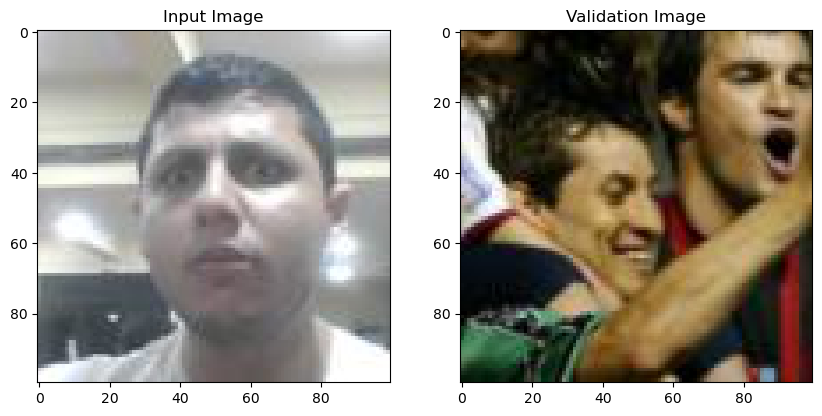

In [190]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `test_input` and `test_val` are tensors with shape [batch_size, channels, height, width]
# Convert tensors to numpy arrays and move from [C, H, W] to [H, W, C] format
test_input_np = test_input[0].cpu().numpy().transpose(1, 2, 0)
test_val_np = test_val[0].cpu().numpy().transpose(1, 2, 0)

# Set plot size
plt.figure(figsize=(10, 8))

# Set first subplot
plt.subplot(1, 2, 1)
plt.imshow(test_input_np)
plt.title("Input Image")

# Set second subplot
plt.subplot(1, 2, 2)
plt.imshow(test_val_np)
plt.title("Validation Image")

# Render the plot
plt.show()


In [191]:
torch.save(embedding_net.state_dict(), 'embedding_net.pth')
torch.save(siamese_network.state_dict(), 'siamese_network.pth')



In [193]:
# Define the embedding network and distance layer again
embedding_net = EmbeddingNet()
distance_layer = L1Dist()

# Create the SiameseNetwork instance
siamese_network = SiameseNetwork(embedding_net, distance_layer)

# Load the saved weights
siamese_network.load_state_dict(torch.load('siamese_network.pth'))

# Switch to evaluation mode
siamese_network.eval()

# Print the model summary
print(siamese_network)


SiameseNetwork(
  (embedding_net): EmbeddingNet(
    (conv1): Conv2d(3, 64, kernel_size=(10, 10), stride=(1, 1))
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1))
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv4): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1))
    (fc1): Linear(in_features=6400, out_features=4096, bias=True)
  )
  (distance_layer): L1Dist()
  (fc): Linear(in_features=4096, out_features=1, bias=True)
)


C:\Users\kalia\AppData\Local\Temp\ipykernel_7304\840916788.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  siamese_network.load_state_dict(torch.load('siamese_network.pt

In [195]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
siamese_network.to(device)

# Get a batch of test data
test_input, test_val, y_true = next(iter(test_loader))  # Assuming test_loader is a DataLoader

# Move data to the appropriate device (CPU/GPU)
test_input, test_val, y_true = test_input.to(device), test_val.to(device), y_true.to(device)

# Make predictions
with torch.no_grad():
    y_hat = siamese_network(test_input, test_val)
    y_hat = torch.sigmoid(y_hat).cpu().numpy()  # Apply sigmoid and move to CPU for numpy conversion

# Post-processing the results
y_hat_binary = [1 if prediction > 0.5 else 0 for prediction in y_hat]

# Convert predictions and true labels to numpy arrays
y_true_np = y_true.cpu().numpy()
y_hat_binary_np = np.array(y_hat_binary)

# Calculate precision and recall
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true_np, y_hat_binary_np)
recall = recall_score(y_true_np, y_hat_binary_np)

print(f'Precision: {precision}')
print(f'Recall: {recall}')


Precision: 0.0
Recall: 0.0


c:\Users\kalia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [197]:
pip install torchsummary


Note: you may need to restart the kernel to use updated packages.


In [199]:
print(siamese_network)


SiameseNetwork(
  (embedding_net): EmbeddingNet(
    (conv1): Conv2d(3, 64, kernel_size=(10, 10), stride=(1, 1))
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1))
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv4): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1))
    (fc1): Linear(in_features=6400, out_features=4096, bias=True)
  )
  (distance_layer): L1Dist()
  (fc): Linear(in_features=4096, out_features=1, bias=True)
)


In [198]:
from torchsummary import summary

# Print model summary
summary(siamese_network, input_size=(3, 100, 100))  # Adjust input_size according to your input dimensions


TypeError: SiameseNetwork.forward() missing 1 required positional argument: 'validation_image'

In [200]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_model(data_loader, model):
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():  # Disable gradient calculations
        for input_image, validation_image, labels in data_loader:
            # Move data to the appropriate device
            input_image, validation_image, labels = input_image.to(device), validation_image.to(device), labels.to(device)
            
            # Make predictions
            outputs = model(input_image, validation_image)
            predictions = torch.sigmoid(outputs).cpu().numpy()  # Apply sigmoid and move to CPU
            
            # Convert predictions to binary
            predictions_binary = [1 if p > 0.5 else 0 for p in predictions]
            
            # Collect all labels and predictions
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions_binary)
    
    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    
    return accuracy, precision, recall


In [202]:
test_loader = 'test_loader'  # Your test DataLoader
accuracy, precision, recall = evaluate_model(test_loader, siamese_network)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


ValueError: not enough values to unpack (expected 3, got 1)